## 数据清洗方法

#### 介绍

本次实验主要是关于数据预处理的第一步数据清洗，数据清洗指删除、更正数据库中错误、不完整、格式有误或多余的数据。数据清理不仅能够更正错误，也可以加强来自各个单独信息系统不同数据间的一致性。

#### 知识点

* 数据有效性判定依据
* 数据清洗常用方法
* 缺失值处理
* 重复值的处理
* IQR 值的计算

### 数据预处理概述

原始数据一般会十分凌乱。不仅数据结构不满足需要，键值也可能存在错误甚至缺失。此时，数据预处理的重要性就突显出来了。数据预处理是一个产生有效数据的过程，即通过自动化、半自动化、甚至手动操作等手段将原始数据文件或者数据仓库里面的数据，处理成能输入到训练模型中的数据。

数据预处理是数据挖掘和模型构建过程中十分重要的步骤。在数据挖掘和机器学习项目中，用「Garbage in, garbage out.」这句话来形容数据预处理的重要性。对没有经过预处理的数据进行分析，结果是没有任何意义的。使用没有经过预处理的数据训练模型，最终可能得到错误的结论。因此，在对数据正式分析之前，预处理的工作必不可少。

Kotsiantis 等在其关于监督学习模型数据预处理的 [<i class="fa fa-external-link-square" aria-hidden="true"> 文章</i>](https://www.semanticscholar.org/paper/Data-Preprocessing-for-Supervised-Leaning-Kotsiantis-Kanellopoulos/063bc9e4db949eb1a8b1f729b0d4ac0ffcfac76e) 中强调，如果前期数据存在大量无关的冗余信息、噪声和不可靠的数据，那么在模型训练阶段几乎不可能发现异常。

在讨论数据预处理方法之前，我们先要明白什么是高质量的数据。一般情况下，从以下 5 个维度进行评定。

<table>
  <tr>
    <th>维度</th>
    <th>说明</th>
  </tr>
  <tr>
    <td>有效性<br>Validity</td>
    <td>数据的有效性源于统计学概念，即符合数据收集时所制定的规则及约束条件的数据。</td>
  </tr>
  <tr>
    <td>精确度<br>Accuracy</td>
    <td>精确度是衡量数据质量的另一个重要条件。<br>一般情况下，通过数据清理很难改善数据的准确度，这就对数据源质量提出了较高的要求。</td>
  </tr>
  <tr>
    <td>完整度<br>Completeness</td>
    <td>如果在采集数据的过程中造成了数据丢失，也就影响了其完整程度。<br>不完整的数据，势必会对分析结论造成影响，这需要进一步采取措施来改善这种情况。</td>
  </tr>
  <tr>
    <td>一致性<br>Consistency</td>
    <td>原始数据中，数据可能会存在不一致性。<br>例如：客户在两个不同的系统中提供了两个不一样的家庭地址，而正确的地址只有一个。<br>那么，就需要我们来判断并消除这种不一致性。</td>
  </tr>
  <tr>
    <td>均匀度<br>Uniformity</td>
    <td>数据的均匀度可能来源于度量单位的不一致，这就需要我们通过换算来解决，使得最终数据统一均匀。</td>
  </tr>
</table>

一般情况下，我们会通过以下 4 个步骤对数据进行处理：

<table>
  <tr>
    <th>序号</th>
    <th>步骤</th>
    <th>说明</th>
  </tr>
  <tr>
    <td>1</td>
    <td>数据清理<br>Data Cleansing</td>
    <td>数据清理大致包括对空缺键值进行填充操作，<br>对噪声数据进行相应的平滑处理，对孤立点和异常点进行删除处理等。</td>
  </tr>
  <tr>
    <td>2</td>
    <td>数据集成<br>Data Integration</td>
    <td>将多个数据库或者数据文件里面包含的数据进行集成处理。</td>
  </tr>
  <tr>
    <td>3</td>
    <td>数据转换<br>Data Transformation</td>
    <td>将数据进行聚集或者规范化处理，从一种形式转换成另外一种我们需要的形式。</td>
  </tr>
  <tr>
    <td>4</td>
    <td>数据规约<br>Data Reduction</td>
    <td>对庞大的数据集进行压缩处理，且尽量保证最终预测结果的一致性。</td>
  </tr>
</table>

与此同时，业界普遍认同数据预处理的过程将消耗整个数据分析流程的大部分时间，大约会占据 60% - 80%。

![](https://upload-images.jianshu.io/upload_images/15406304-236cd35cc443f598.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

首先，我们将介绍数据清洗。数据清洗是非常关键和重要的一步，它主要包括对空缺键值进行填充操作，对噪声数据进行相应的平滑处理，对孤立点和异常点进行删除处理等。

### 缺失值处理

缺失数据是数据清洗过程中常遇到的情况。数据缺失的原因多种多样，例如采集数据设备的损坏，造成某几天的数据缺失。或者是数据在传输、整理过程中造成的缺失。

对于缺失数据而言，通常都是需要处理的。在处理之前，我们先了解如何定位到缺失数据。

#### 标记缺失数据

首先，我们生成一组包含缺失数据的示例数据。

In [1]:
import numpy as np
import pandas as pd

null_data = {'A': [10, np.nan, 25, np.nan, 42, np.nan],
             'B': [12, 15, np.nan, 14, 17, np.nan],
             'C': [10, 13, 27, 13, 19, 40]}

df = pd.DataFrame(null_data)
df

,A,B,C
0,10.0,12.0,10
1,NaN,15.0,13
2,25.0,NaN,27
3,NaN,14.0,13
4,42.0,17.0,19
5,NaN,NaN,40


Pandas 对于不同类型的空值有不一样的标注，对于数值型空值会使用 `NaN`（Not a Number）标识，对于字符串统一采样 `None` 标识。可以看到，上面的示例 DataFrame 中包含 4 个 `NaN` 值。

当我们使用 Pandas 定位缺失数据时，通常会使用 `isnull()` 或者 `notnull()` 两种方法。二者均会返回布尔值，当我们使用 `isnull()` 时，返回 `True` 即代表是缺失值。

官方文档 [<i class="fa fa-external-link-square" aria-hidden="true"> pandas.DataFrame.isnull</i>](http://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.DataFrame.isnull.html)

In [2]:
df.isnull()  # True 为缺失值

,A,B,C
0,False,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,False,False,False
5,True,True,False


如果想要统计每列包含多少个缺失值，只需要添加 `sum()` 即可。

In [3]:
df.isnull().sum()  # 统计每列缺失值数量

A    3
B    2
C    0
dtype: int64

#### 删除缺失数据

缺失值处理最简单的方法就是「不处理，直接删除」，你可能觉得这句话是个「玩笑」，其实真的存在。对于直接删除缺失数据，主要存在于以下几种情形：

- 缺失数据占全部数据比例非常低，基本可以忽略不计，删除后且不会对整体数据分布产生影响。
- 缺失数据因为本身特性无法填充，比如对于某些检测指标，如果填充不准确会严重影响最终结果。这种情况下，宁愿删除也不要进行处理。

Pandas 删除缺失数据的操作主要是通过 `dropna()` 完成。

官方文档 [<i class="fa fa-external-link-square" aria-hidden="true"> pandas.DataFrame.dropna</i>](http://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.DataFrame.dropna.html)

In [4]:
df.dropna()  # 删除全部存在缺失值的行

,A,B,C
0,10.0,12.0,10
4,42.0,17.0,19


上面的操作中，我们删除了全部存在缺失值的行。实际情况中，我们可能会有下面几种删除缺失值的需求：

In [5]:
df.dropna(axis=1)  # 删除全部存在缺失值的列

,C
0,10
1,13
2,27
3,13
4,19
5,40


In [6]:
df.dropna(how='all')  # 删除全部值均为缺失值的行

,A,B,C
0,10.0,12.0,10
1,NaN,15.0,13
2,25.0,NaN,27
3,NaN,14.0,13
4,42.0,17.0,19
5,NaN,NaN,40


In [7]:
df.dropna(thresh=2)  # 删除行，且该行非缺失值少于 2 个

,A,B,C
0,10.0,12.0,10
1,NaN,15.0,13
2,25.0,NaN,27
3,NaN,14.0,13
4,42.0,17.0,19


#### 填充缺失值

除了直接删除缺失值这种「简单又暴力」的操作，还有一种经常使用到的方法是对缺失值进行填充。而填充一般分为 3 种情况：

- 固定值填充：人为指定，或使用行/列均值、中位数等。
- 临近值填充：使用缺失值相临近的数值填充。
- 数学填充：使用函数插值填充。

首先，我们使用固定值进行填充。这里可以直接使用 Pandas 提供的 `replace` 完成。

In [8]:
df.replace(np.nan, 0)  # 将缺失值填充为 0

,A,B,C
0,10.0,12.0,10
1,0.0,15.0,13
2,25.0,0.0,27
3,0.0,14.0,13
4,42.0,17.0,19
5,0.0,0.0,40


当然，Pandas 提供了一个专门用于填充缺失值的函数 `fillna()`，所以：

官方文档 [<i class="fa fa-external-link-square" aria-hidden="true"> pandas.DataFrame.fillna</i>](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)

In [9]:
df.fillna(0)  # 将缺失值填充为 0

,A,B,C
0,10.0,12.0,10
1,0.0,15.0,13
2,25.0,0.0,27
3,0.0,14.0,13
4,42.0,17.0,19
5,0.0,0.0,40


如果要使用平均值或者中位数进行填充

In [10]:
df.fillna(df.mean())  # 使用各列平均值填充

,A,B,C
0,10.000000,12.0,10
1,25.666667,15.0,13
2,25.000000,14.5,27
3,25.666667,14.0,13
4,42.000000,17.0,19
5,25.666667,14.5,40


In [11]:
df.fillna(df.median())  # 使用各列中位数填充

,A,B,C
0,10.0,12.0,10
1,25.0,15.0,13
2,25.0,14.5,27
3,25.0,14.0,13
4,42.0,17.0,19
5,25.0,14.5,40


当我们使用 `fillna` 填充缺失值时，我们还可以使用临近值填充。如果数据在短时间内的变化不大，那么临近值填充是一个很好的方式。例如气温数据的变化，如果已知 13:00 的气温而 13:15 数据缺失，那么就可以初略地使用 13:00 的气温填充 13:15 的缺失值。

同样，还是拿上面的 `df` 示例。

In [12]:
df.fillna(method='bfill')  # 使用后一个临近数据向前填充

,A,B,C
0,10.0,12.0,10
1,25.0,15.0,13
2,25.0,14.0,27
3,42.0,14.0,13
4,42.0,17.0,19
5,NaN,NaN,40


In [13]:
df.fillna(method='ffill')  # 使用前一个临近数据向后填充

,A,B,C
0,10.0,12.0,10
1,10.0,15.0,13
2,25.0,15.0,27
3,25.0,14.0,13
4,42.0,17.0,19
5,42.0,17.0,40


上面介绍了固定值和临近值填充方法。很多时候，数据虽然缺失但仍然能看出数据的变化趋势，此时更好的缺失值填充方法是使用数据方法进行插值。Pandas 中的 `interpolate()` 可以帮助我们快速应用一些常用的插值函数。

官方文档 [<i class="fa fa-external-link-square" aria-hidden="true"> pandas.DataFrame.interpolate</i>](http://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.DataFrame.interpolate.html)

In [14]:
sample_data = {'A': [1, np.nan, 3, np.nan, 5, 6],
               'B': [1, 4, np.nan, np.nan, 25, 36]}

df = pd.DataFrame(sample_data)
df

,A,B
0,1.0,1.0
1,NaN,4.0
2,3.0,NaN
3,NaN,NaN
4,5.0,25.0
5,6.0,36.0


上面这两列示例数据，你可以看到 A 列明显是线性增加趋势，而 B 列是 $X^{2}$ 增加趋势。此时，如果用临近值填充显然不妥，就可以通过线性插值或者多项式插值完成。

In [15]:
df.interpolate(method='linear')  # 线性插值

,A,B
0,1.0,1.0
1,2.0,4.0
2,3.0,11.0
3,4.0,18.0
4,5.0,25.0
5,6.0,36.0


In [16]:
df.interpolate(method='polynomial', order=2)  # 2 次函数插值

,A,B
0,1.0,1.0
1,2.0,4.0
2,3.0,9.0
3,4.0,16.0
4,5.0,25.0
5,6.0,36.0


### 重复值处理

除了缺失值，数据还容易出现另外一种情形，也就是重复值。下面，介绍以下使用 Pandas 清除重复值的方法。同样，我们先生成一组示例数据。

In [17]:
df = pd.DataFrame({'name': ['amy', 'david'] * 3 +
                   ['jam'], 'class': [2, 2, 2, 4, 3, 2, 4]})
df

,name,class
0,amy,2
1,david,2
2,amy,2
3,david,4
4,amy,3
5,david,2
6,jam,4


与缺失值判断相似，你可以使用 Pandas 提供的 `duplicated()` 方法判断重复值，如果存在重复值则返回 `True`。

官方文档 [<i class="fa fa-external-link-square" aria-hidden="true"> pandas.DataFrame.duplicated</i>](http://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.DataFrame.duplicated.html)

In [18]:
df.duplicated()  # 判断重复值

0    False
1    False
2     True
3    False
4    False
5     True
6    False
dtype: bool

In [19]:
df.duplicated().sum()  # 统计判断重复值

2

接下来，可以使用 `drop_duplicates()` 去除全部重复值。

官方文档 [<i class="fa fa-external-link-square" aria-hidden="true"> pandas.DataFrame.drop_duplicates</i>](http://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.DataFrame.drop_duplicates.html)

In [20]:
df.drop_duplicates()  # 去除重复值

,name,class
0,amy,2
1,david,2
3,david,4
4,amy,3
6,jam,4


如上所示，`drop_duplicates()` 在去除重复值时，会对全部列进行判断。如果你只想去除 `name` 列的重复值，可以单独指定。

In [21]:
df.drop_duplicates(['name'])  # 去除 name 列重复值

,name,class
0,amy,2
1,david,2
6,jam,4


还有一个实用的技巧在于保留缺失值的顺序。如上所示，`drop_duplicates()` 默认保留重复项前面的值，而去除后面的值。你可以选择保留重复值最后出现的值。

In [22]:
df.drop_duplicates(keep='last')  # 保留重复值最后一个

,name,class
2,amy,2
3,david,4
4,amy,3
5,david,2
6,jam,4


### 异常值处理

维基百科 [<i class="fa fa-external-link-square" aria-hidden="true"> Probability density function</i>](https://en.wikipedia.org/wiki/Probability_density_function)

除了缺失值与重复值，在处理数值型数据时，我们还容易遇到一种状况，那就是异常值。异常值检测是处理数值型数据过程中必须重视的一项工作。那些在收集、录入过程中产生的异常数据，如果不及时剔除，很可能对后续的预测分析带来严重不良影响。

应用数学和统计学领域对异常值检测研究比较深入，目前存在的检测方法也非常多。大致来讲，有从概率方法入手的一元正态分布及多元高斯方法，还有通过矩阵分解和神经网络进行异常值检测的相关方法。

在这里，我们介绍一种简单直观的异常值检测方法，那就是通过箱形图（箱线图）来识别异常数据。箱形图（下方红色）是用来观测数据集分布的一种图形类型。箱形图中，从下到上（下图从左到右）依次有 6 个数据节点，分别是：下界、下四分位、均值、中位数、上四分位、上界。

![](https://upload-images.jianshu.io/upload_images/15406304-bba97c59a02367ff.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

如上图所示，我们可以看到正太分布 $N(0, \sigma^2)$ 及其所对应的箱形图。由于正太分布的中位数等于均值，所以上图只看到了 5 个数据节点。

四分位数，是指将一组数据值按大小排序后分成四等分，每一部分包含 `1/4` 的数据，这种划分的分割点就是四分位数。其中第 1 部分和第 2 部分的分割点称为第 1 分位数 $Q_1$, 也被称为第 25 百分位数（下四分位）。第 3 部分和第 4 部分的分割点称为第 3 四分位数 $Q_3$，也被称为第 75 百分位数（上四分位）。而第二部分和第三部分的分割点是第 2 四分数，也就是中位数。其中四分位距 $IQR$ 是指第三四分位数和第一分四分位数的差，也就是 $IQR = Q_3 - Q_1 $。

所有小于 $ Q_1 - 1.5IQR $ 或 大于 $ Q_3 + 1.5IQR $ 的数据项被称为异常值。那么，我们就可以通过该判断依据来标记异常数据。

接下来，我们可以生成一组数据，并找出异常值。

In [23]:
np.random.seed(10)  # 随机数种子
normal_data = np.random.randn(200)  # 生成一组正太分布随机数据
normal_data

array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
       -0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021,
        0.43302619,  1.20303737, -0.96506567,  1.02827408,  0.22863013,
        0.44513761, -1.13660221,  0.13513688,  1.484537  , -1.07980489,
       -1.97772828, -1.7433723 ,  0.26607016,  2.38496733,  1.12369125,
        1.67262221,  0.09914922,  1.39799638, -0.27124799,  0.61320418,
       -0.26731719, -0.54930901,  0.1327083 , -0.47614201,  1.30847308,
        0.19501328,  0.40020999, -0.33763234,  1.25647226, -0.7319695 ,
        0.66023155, -0.35087189, -0.93943336, -0.48933722, -0.80459114,
       -0.21269764, -0.33914025,  0.31216994,  0.56515267, -0.14742026,
       -0.02590534,  0.2890942 , -0.53987907,  0.70816002,  0.84222474,
        0.2035808 ,  2.39470366,  0.91745894, -0.11227247, -0.36218045,
       -0.23218226, -0.5017289 ,  1.12878515, -0.69781003, -0.08112218,
       -0.52929608,  1.04618286, -1.41855603, -0.36249918, -0.12

接下来，我们计算 IQR 值，以及异常值上下界限。

In [24]:
# 使用 numpy 提供的 percentile 方法计算百分位数
Q1 = np.percentile(normal_data, 25)  # 下四分位
Q3 = np.percentile(normal_data, 75)  # 上四分位

# 计算 IQR 值
IQR = Q3 - Q1
outlier1 = Q1 - 1.5 * IQR
outlier2 = Q3 + 1.5 * IQR

outlier1, outlier2  # 异常值判断标准

(-2.2053897623721834, 2.3852385150262467)

最终，我们输出愿数据中大于上界与小于下界的数据。

In [25]:
np.append(normal_data[normal_data < outlier1],
          normal_data[normal_data > outlier2])

array([-2.97959677, -2.29510333,  2.39470366,  2.46765106,  2.40432561,
        2.46532508])

如上所示，输出值即为数据集中的异常值。其实，我们可以通过 Matplotlib 绘制出上方数据的箱形图，这里会用到 `boxplot()` 方法。

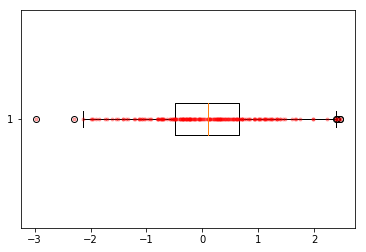

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

box = plt.boxplot(normal_data, whis=1.5, vert=False)  # 绘制箱形图
scatter = plt.plot(normal_data, np.linspace(1, 1, 200), 'r.', alpha=0.3)  # 绘制原数据点方便对比

其实，除了上方直接计算异常点的方法。还有一种方法就是通过 Matplotlib 绘图结果获取。代码如下：

In [27]:
box['fliers'][0].get_xdata()

array([-2.97959677, -2.29510333,  2.39470366,  2.46765106,  2.40432561,
        2.46532508])

这里得到的异常值数据与上方手动计算结果一模一样。

实际上，异常检测处理不仅仅是一种数据预处理手段，很多时候会单独以数据分析任务出现。例如：

- **信用卡欺诈检测**：信用卡是一种广泛使用的金融工具，但很多时候可能被盗用、冒用。这些问题，不仅对持卡人造成财产损失，也增加了发卡行的风险。信用卡欺诈检测就是一种发卡行对交易行为进行异常检测的应用。冒用信用卡的购买行为可能不同于持卡人不同，那么通过寻找异常交易模式，就能在关键时刻拒绝交易，尽可能保证信用卡消费安全。

- **网络入侵检测**：如今，网络攻击已成家常便饭，大国之间也经常互相指责对方实施网络攻击行为。很多时候，我们不一定需要等到网络攻击实施完成之后才后知后觉，而是借助异常检测分析网络行为、安全日志、审计数据、其它网络上可以获得的信息以及计算机系统中若干关键点的信息，检查网络或系统中是否存在违反安全策略的行为和被攻击的迹象。

- **公共卫生安全**：公共卫生安全是每个国家都极其重视和加强防范的任务，通过检测医院诊疗数据、疫苗接种数据、气候变化数据等，可以及时发现异常，并预防重大公共卫生安全事件的发生。

当然，要解决上面提到的这些问题，就需要学习更多的异常检测方法，部分内容将在后续的实验中学习。